In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#variables that change for different stocks and different window and duration
stock = 'TATAMOTORS'
window = 60 #How much previous data to use for each prediction
duration = 15 #Closing price to be predicted after how many days from today

In [61]:
df = pd.read_csv('C:\\Users\\nrkat\\Downloads\\archive\\Datasets\\SCRIP\\' + stock + '.csv')

In [62]:
df.shape

(6350, 15)

In [63]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,TELCO,EQ,379.80,378.00,380.0,377.50,NaN,380.00,378.94,7800,2.955715e+11,NaN,NaN,NaN
1,1996-01-02,TELCO,EQ,380.00,380.00,383.9,376.00,NaN,377.80,380.09,19350,7.354800e+11,NaN,NaN,NaN
2,1996-01-03,TELCO,EQ,377.80,377.80,380.0,376.25,NaN,376.55,378.43,5700,2.157065e+11,NaN,NaN,NaN
3,1996-01-04,TELCO,EQ,376.55,376.55,377.0,371.50,NaN,373.70,374.62,20100,7.529930e+11,NaN,NaN,NaN
4,1996-01-05,TELCO,EQ,373.70,373.70,374.8,371.00,NaN,372.35,372.60,12000,4.471250e+11,NaN,NaN,NaN


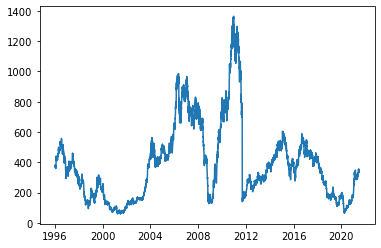

In [64]:
dates = pd.to_datetime(df['Date'])
plt.plot_date(dates, df['Close'],fmt='-')
plt.savefig(stock+ ".png")

In [65]:
close_price = df['Close']
next_close = []
for i in range(len(close_price) - duration):
    next_close.append(close_price[i+duration])

close_price = close_price[:len(df)-duration]
print(pd.DataFrame({'i':close_price, 'i + '+ str(duration): next_close}))

           i  i + 15
0     380.00  380.05
1     377.80  370.05
2     376.55  358.80
3     373.70  360.25
4     372.35  361.90
...      ...     ...
6330  334.95  339.65
6331  345.50  342.80
6332  352.75  341.55
6333  343.35  339.60
6334  344.75  344.25

[6335 rows x 2 columns]


In [66]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scaled = sc.fit_transform(pd.DataFrame(close_price))
y_scaled = sc.fit_transform(pd.DataFrame(next_close))

In [67]:
x = []
for i in range(window,len(close_price)):
    x.append(x_scaled[i-window:i])
    
x = np.array(x)
x = np.reshape(x,(x.shape[0],x.shape[1],1))
y = y_scaled[window:]

print(x.shape)
print(y.shape)

(6275, 60, 1)
(6275, 1)


In [68]:
index = int(len(close_price) * 0.8)
x_train = x[:index]
y_train = y[:index]

x_test = x[index:]
y_test = y[index:]
print("Train size: ",y_train.shape)
print("Test size:",y_test.shape)

Train size:  (5068, 1)
Test size: (1207, 1)


In [69]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [70]:
reg = Sequential()

reg.add(LSTM(units = 60,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=20, batch_size =100,verbose=2)

Epoch 1/20
51/51 - 11s - loss: 0.0120 - 11s/epoch - 221ms/step
Epoch 2/20
51/51 - 5s - loss: 0.0051 - 5s/epoch - 106ms/step
Epoch 3/20
51/51 - 5s - loss: 0.0048 - 5s/epoch - 106ms/step
Epoch 4/20
51/51 - 5s - loss: 0.0045 - 5s/epoch - 106ms/step
Epoch 5/20
51/51 - 5s - loss: 0.0046 - 5s/epoch - 106ms/step
Epoch 6/20
51/51 - 5s - loss: 0.0041 - 5s/epoch - 105ms/step
Epoch 7/20
51/51 - 5s - loss: 0.0043 - 5s/epoch - 106ms/step
Epoch 8/20
51/51 - 5s - loss: 0.0040 - 5s/epoch - 106ms/step
Epoch 9/20
51/51 - 5s - loss: 0.0035 - 5s/epoch - 105ms/step
Epoch 10/20
51/51 - 5s - loss: 0.0038 - 5s/epoch - 105ms/step
Epoch 11/20
51/51 - 5s - loss: 0.0036 - 5s/epoch - 106ms/step
Epoch 12/20
51/51 - 5s - loss: 0.0035 - 5s/epoch - 108ms/step
Epoch 13/20
51/51 - 5s - loss: 0.0036 - 5s/epoch - 103ms/step
Epoch 14/20
51/51 - 5s - loss: 0.0036 - 5s/epoch - 97ms/step
Epoch 15/20
51/51 - 5s - loss: 0.0034 - 5s/epoch - 99ms/step
Epoch 16/20
51/51 - 5s - loss: 0.0032 - 5s/epoch - 98ms/step
Epoch 17/20
51/51 

In [71]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)

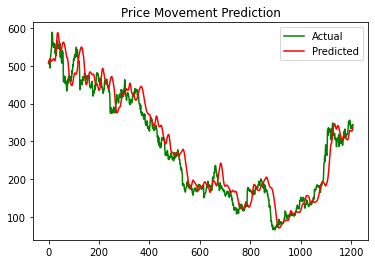

In [72]:
plt.plot(y_test,color='green',label="Actual")
plt.plot(pred,color='red',label="Predicted")
plt.title('Price Movement Prediction')
plt.legend()
plt.savefig(stock + " - 30 - performance.png")

In [73]:
rms = np.sqrt(np.mean(np.power((y_test-pred),2)))
rms

36.970956713444075

In [74]:
true_trend = []
pred_trend = []

for i in range(len(y_test)):
    today = close_price[window + index + i]
    if today > y_test[i]:
        true_trend.append(0)
    else:
        true_trend.append(1)
        
    if today > pred[i]:
        pred_trend.append(0)
    else:
        pred_trend.append(1)
matrix = pd.DataFrame({'Actual': true_trend, 'Pred': pred_trend})

In [77]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_trend[:60], pred_trend[:60])
acc

0.6333333333333333